In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rakeshkapilavai_extrovert_vs_introvert_behavior_data_path = kagglehub.dataset_download('rakeshkapilavai/extrovert-vs-introvert-behavior-data')

print('Data source import complete.')


Using Colab cache for faster access to the 'extrovert-vs-introvert-behavior-data' dataset.
Data source import complete.


In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv(rakeshkapilavai_extrovert_vs_introvert_behavior_data_path + '/personality_dataset.csv')

In [4]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [5]:
df.tail()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert
2899,3.0,No,6.0,6.0,No,6.0,9.0,Extrovert


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [7]:
df.shape

(2900, 8)

In [8]:
df.isnull().sum()

,0
Time_spent_Alone,63
Stage_fear,73
Social_event_attendance,62
Going_outside,66
Drained_after_socializing,52
Friends_circle_size,77
Post_frequency,65
Personality,0


In [9]:
df.sample(2)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
185,10.0,Yes,1.0,0.0,Yes,0.0,3.0,Introvert
258,4.0,Yes,2.0,0.0,Yes,1.0,1.0,Introvert


In [10]:
df = df.dropna()

In [11]:
df.shape

(2477, 8)

In [12]:
df.isnull().sum()

,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


Prediction

In [13]:
# encoding
df['Stage_fear'] = df['Stage_fear'].replace({'Yes':1,'No':0})

/tmp/ipython-input-2942214037.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Stage_fear'] = df['Stage_fear'].replace({'Yes':1,'No':0})


In [14]:
df['Personality'] = df['Personality'].replace({'Extrovert':1, "Introvert":0})

/tmp/ipython-input-3930030607.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Personality'] = df['Personality'].replace({'Extrovert':1, "Introvert":0})


In [15]:
df['Drained_after_socializing'] = df['Drained_after_socializing'].replace({'Yes':1,'No':0})

/tmp/ipython-input-987465499.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Drained_after_socializing'] = df['Drained_after_socializing'].replace({'Yes':1,'No':0})


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [17]:
x = df[['Time_spent_Alone',
       'Stage_fear',
       'Social_event_attendance',
       'Going_outside',
       'Drained_after_socializing',
       'Friends_circle_size',
       'Post_frequency']]
y = df['Personality']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [20]:
model = LogisticRegression()

In [21]:
model.fit(x_train, y_train)

LogisticRegression()

In [22]:
y_pred = model.predict(x_test)

In [24]:
# mean squre error (the difference between y_pred and y_test)
mse = mean_squared_error(y_pred, y_test)

In [26]:
print(mse)

0.07258064516129033


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2477 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2477 non-null   float64
 1   Stage_fear                 2477 non-null   int64  
 2   Social_event_attendance    2477 non-null   float64
 3   Going_outside              2477 non-null   float64
 4   Drained_after_socializing  2477 non-null   int64  
 5   Friends_circle_size        2477 non-null   float64
 6   Post_frequency             2477 non-null   float64
 7   Personality                2477 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 174.2 KB


In [52]:
# test
test_data = [[4, 1, 2, 2, 1, 3, 0]]

In [53]:
prediction = model.predict(test_data)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [54]:
if prediction == 0:
  print("You are introvert")
elif prediction == 1:
  print("You are extrovert")

You are introvert


Correlation

In [56]:
df.corr().round(2)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
Time_spent_Alone,1.00,0.86,-0.73,-0.75,0.86,-0.72,-0.73,-0.70
Stage_fear,0.86,1.00,-0.86,-0.88,1.00,-0.84,-0.85,-0.85
Social_event_attendance,-0.73,-0.86,1.00,0.75,-0.86,0.74,0.75,0.71
Going_outside,-0.75,-0.88,0.75,1.00,-0.88,0.74,0.77,0.73
Drained_after_socializing,0.86,1.00,-0.86,-0.88,1.00,-0.84,-0.85,-0.85
Friends_circle_size,-0.72,-0.84,0.74,0.74,-0.84,1.00,0.71,0.68
Post_frequency,-0.73,-0.85,0.75,0.77,-0.85,0.71,1.00,0.71
Personality,-0.70,-0.85,0.71,0.73,-0.85,0.68,0.71,1.00


<Axes: >

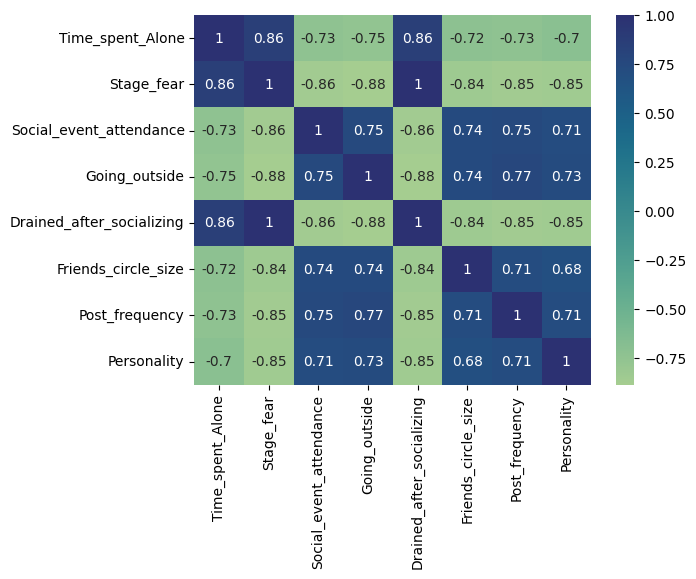

In [105]:
sns.heatmap(df.corr(), annot=True, cmap='crest')

summary from correlation heatmap
- personality has positive relation with social event attendance, going outside time, friend size, post frequency (if these factor is high then extrovert)
- personality has opposite relation with time spend alone, stage fear, drain after socializing (if time spend alone is high and stage fear/drain = 1, then introvert)

Social Media Engagement

In [58]:
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [60]:
df['Post_frequency'].mean().round()

np.float64(4.0)

In [61]:
df['Post_frequency'].max()

10.0

In [62]:
df['Post_frequency'].min()

0.0

In [80]:
post_chat = df.groupby('Personality')['Post_frequency'].mean().round()

In [81]:
post_chat

,Post_frequency
Personality,
0,1.0
1,6.0


<Axes: title={'center': 'The difference between average posting'}, ylabel='Personality'>

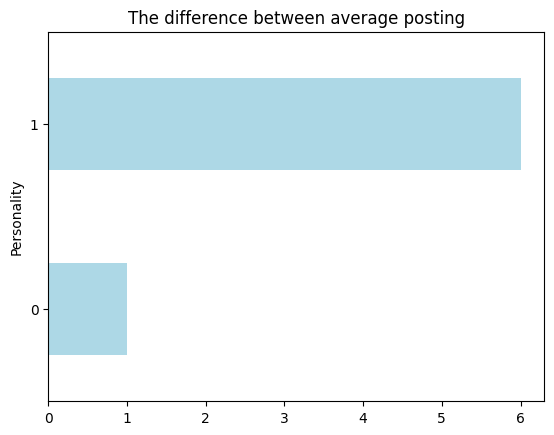

In [82]:
# post_chat.index = ["introvert", "extrovert"]
post_chat.plot(kind = 'barh', color = 'lightblue', title = 'The difference between average posting')

In [87]:
df.groupby('Personality')['Time_spent_Alone'].mean().round()

,Time_spent_Alone
Personality,
0,7.0
1,2.0


In [88]:
df.groupby('Personality')['Social_event_attendance'].mean().round()

,Social_event_attendance
Personality,
0,2.0
1,6.0


In [89]:
df.groupby('Personality')['Going_outside'].mean().round()

,Going_outside
Personality,
0,1.0
1,5.0


In [90]:
df.groupby('Personality')['Friends_circle_size'].mean().round()

,Friends_circle_size
Personality,
0,3.0
1,9.0


<Axes: >

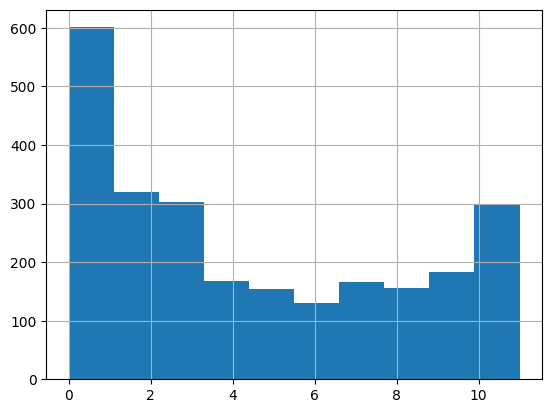

In [94]:
df['Time_spent_Alone'].hist()

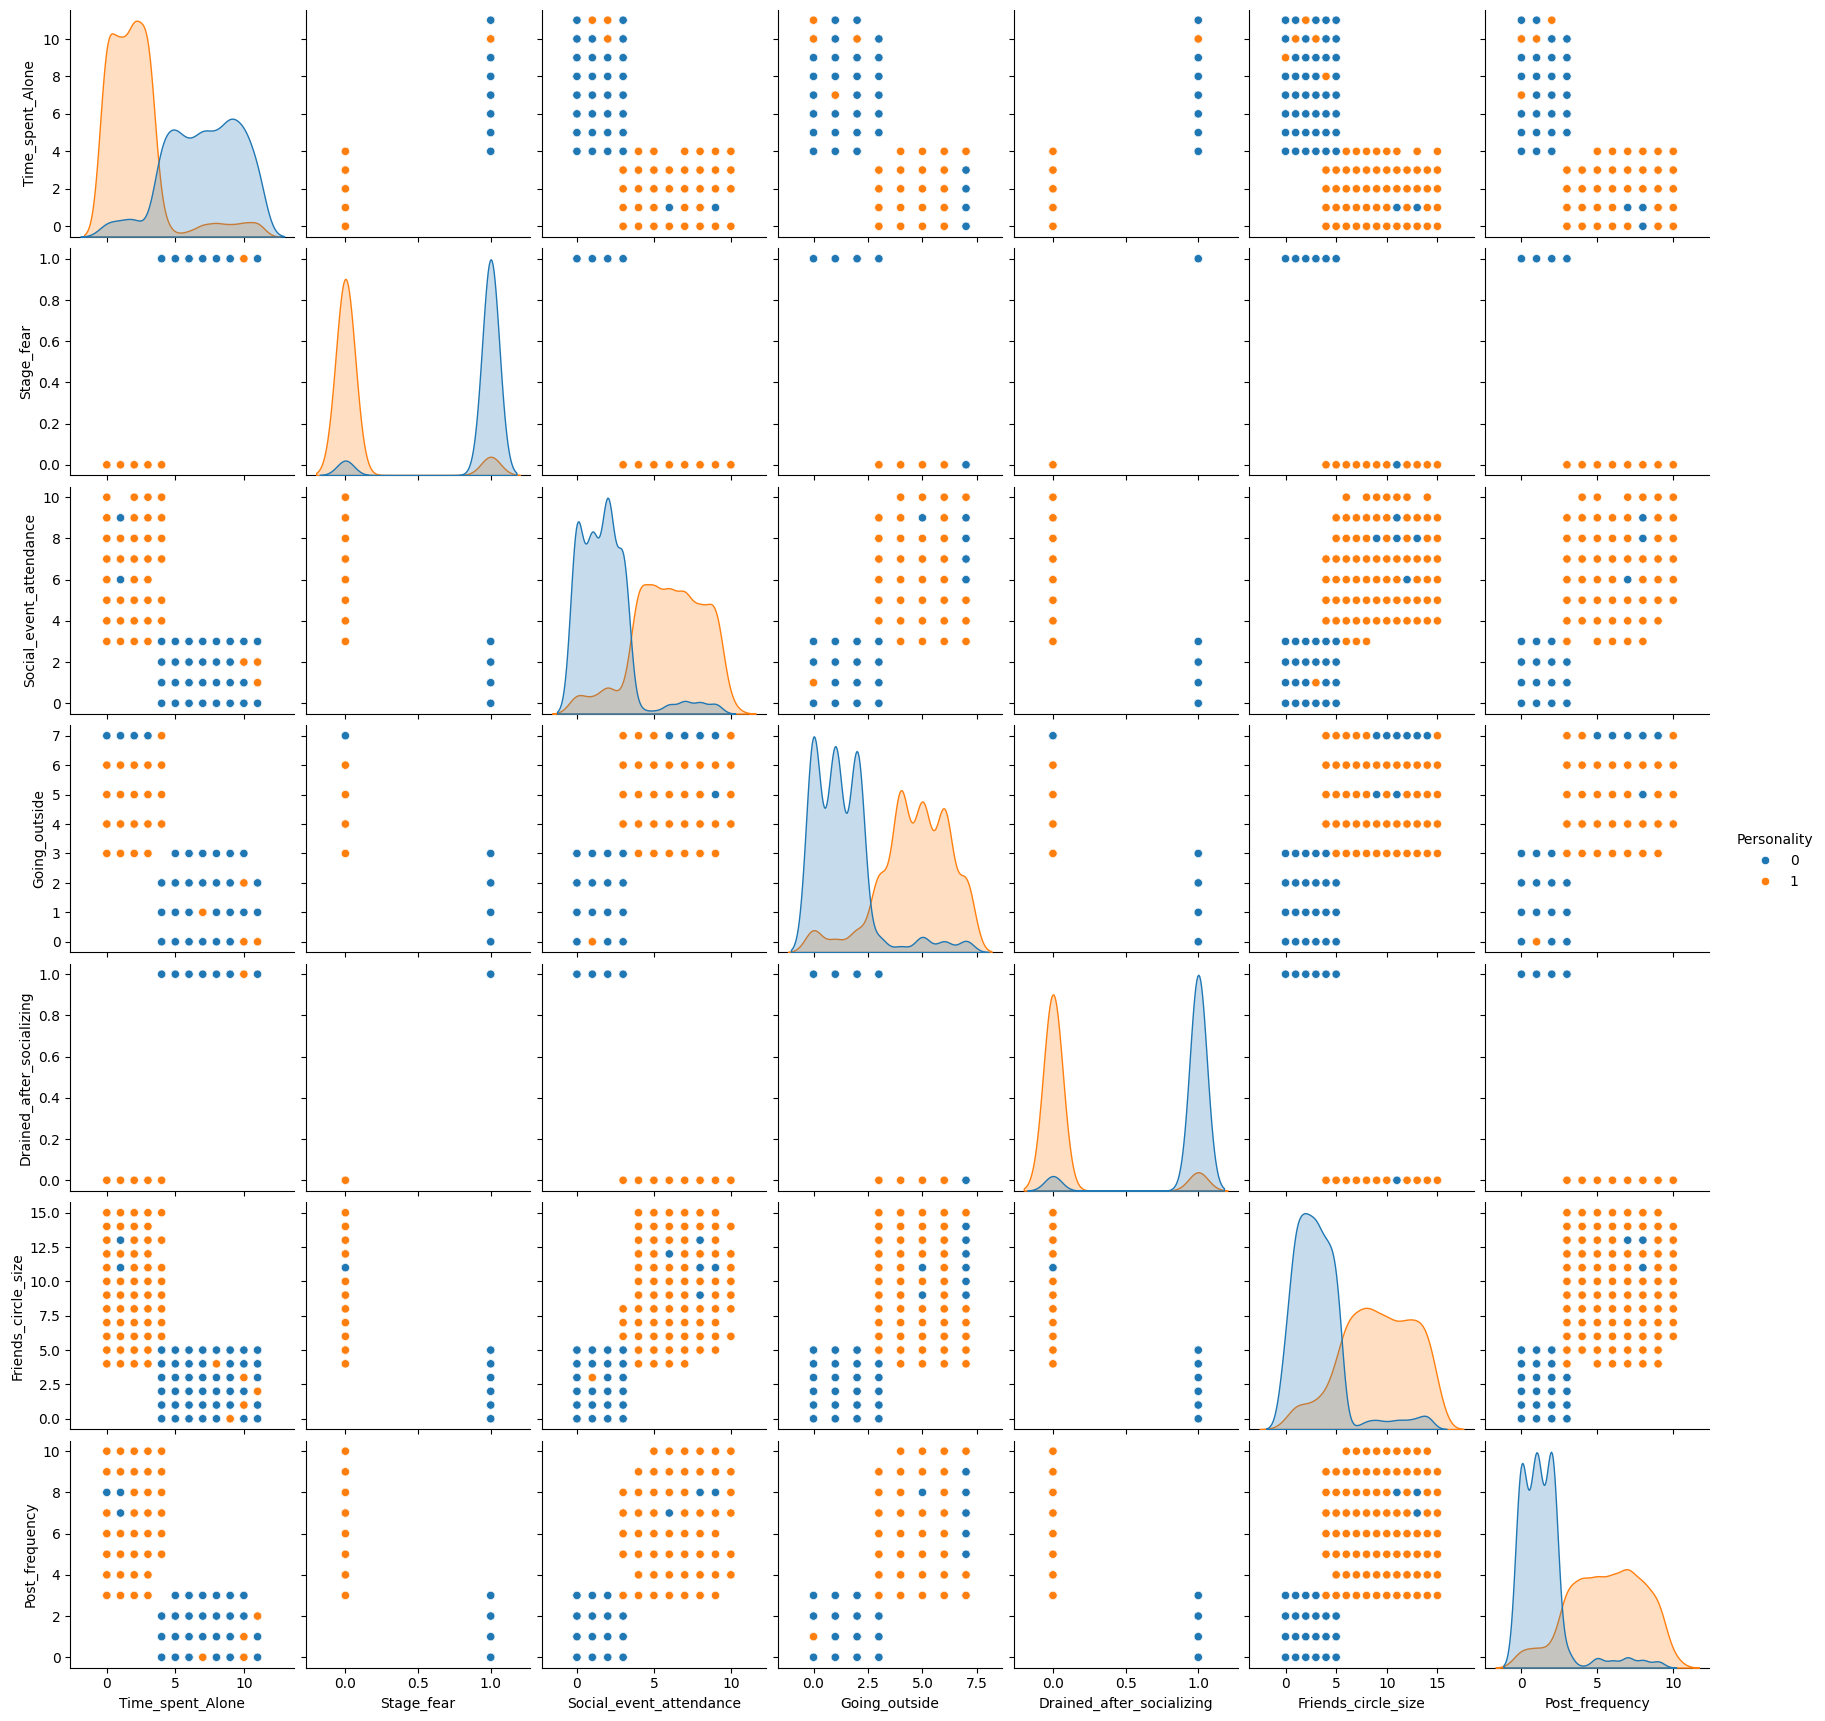

In [97]:
sns.pairplot(df, hue = "Personality")